In [7]:
#VADER(Valence Aware Dictionary for Sentiment Reasoning) which has been designed for Social Media Sentiment Analysis. Another advantage it posseses is that it does not require a lot of preprocessing.

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kritikagarg/nltk_data...


True

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [4]:
# Load the data
df = pd.read_csv('cleaned_data/1cleanedall.tsv', sep='\t', header=None, names=['datetime', 'tweet', 'hashtags'])

In [ ]:
# sid = SentimentIntensityAnalyzer()
# df["Polarity Scores"] = df["content_to_input"].apply(lambda x: sid.polarity_scores(x))
# def sentiment_label(x):
#     if x["compound"]>0.05:
#         return "Positive"
#     elif x["compound"]<-0.05:
#         return "Negative"
#     else: 
#         return "Neutral"
# df["Sentiment_Label"] = df["Polarity Scores"].apply(lambda x: sentiment_label(x))
# df = df.drop("Polarity Scores", axis=1)
# df.head(4)

In [5]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(tweet):
    return sid.polarity_scores(tweet)

# Apply the function to the second column (assuming it's at index 1)
df['sentiment_scores'] = df.iloc[:, 1].apply(get_sentiment_scores)

# Extracting the compound score for easier interpretation
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

In [26]:
df['compound'].describe()

count    2829.000000
mean        0.003606
std         0.468097
min        -0.960700
25%        -0.340000
50%         0.000000
75%         0.361200
max         0.982800
Name: compound, dtype: float64

In [8]:
def categorize_sentiment(compound_score):
    if compound_score > 0.05:
        return "positive"
    elif compound_score < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the function to categorize sentiment
df['sentiment_category'] = df['compound'].apply(categorize_sentiment)

In [9]:
df.head()

,datetime,tweet,hashtags,sentiment_scores,compound,sentiment_category
0,10/26/24 11:26:16,strong women scare weak men respect donald tru...,#donald #trump #donaldtrump #maga #cult #magac...,"{'neg': 0.167, 'neu': 0.658, 'pos': 0.175, 'co...",0.0772,positive
1,10/26/24 11:29:09,wanna know win election check candidates tube ...,#Election #YouTube #Kamala #Harris #Donald #Tr...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.5859,positive
2,10/26/24 12:16:10,donald trump got vote save america americas be...,#donald #trump #got #AmericasBestPicsAndVideos,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",0.8126,positive
3,10/26/24 12:20:57,realdonaldtrump cant wait vote nov donald,#donald,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,10/26/24 12:25:53,donald trump sealonaldtrump americas best pics...,#donald #trump #sealonaldtrump #AmericasBestPi...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,positive


In [10]:
df = df.drop(columns=['sentiment_scores'])

In [11]:
df.to_csv("1cleanedall_with_sentiment.tsv", sep='\t', index=False)

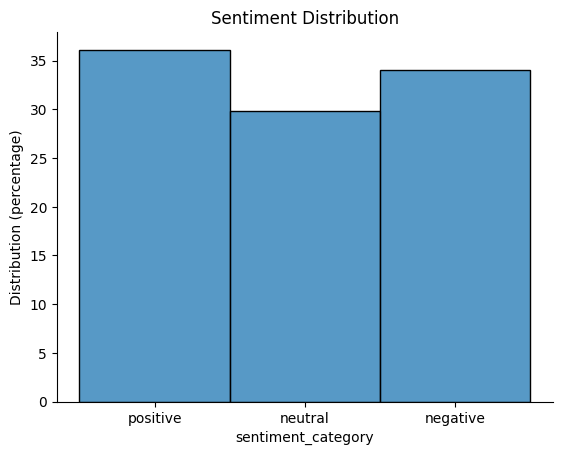

In [19]:
ax = sns.histplot(data=df, x="sentiment_category", stat="percent" )
plt.title("Sentiment Distribution")
plt.ylabel("Distribution (percentage)")
ax.spines[['right', 'top']].set_visible(False)

In [20]:
df['date'] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m-%d')


/var/folders/8x/ls3_86k12g91w0kjykg2gd080000gn/T/ipykernel_22279/4263352374.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['datetime']).dt.strftime('%Y-%m-%d')


In [21]:
df.head()

,datetime,tweet,hashtags,compound,sentiment_category,date
0,10/26/24 11:26:16,strong women scare weak men respect donald tru...,#donald #trump #donaldtrump #maga #cult #magac...,0.0772,positive,2024-10-26
1,10/26/24 11:29:09,wanna know win election check candidates tube ...,#Election #YouTube #Kamala #Harris #Donald #Tr...,0.5859,positive,2024-10-26
2,10/26/24 12:16:10,donald trump got vote save america americas be...,#donald #trump #got #AmericasBestPicsAndVideos,0.8126,positive,2024-10-26
3,10/26/24 12:20:57,realdonaldtrump cant wait vote nov donald,#donald,0.0000,neutral,2024-10-26
4,10/26/24 12:25:53,donald trump sealonaldtrump americas best pics...,#donald #trump #sealonaldtrump #AmericasBestPi...,0.6369,positive,2024-10-26


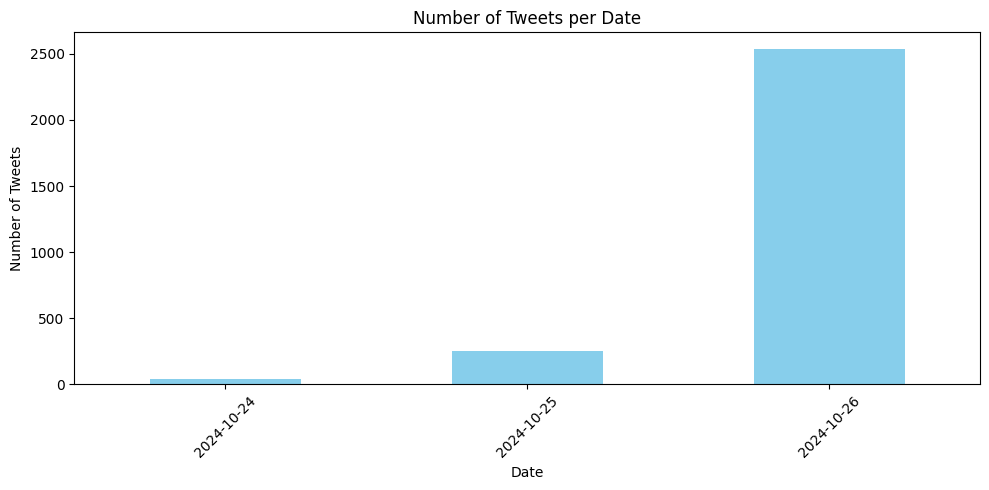

In [29]:
tweet_counts = df['date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 5))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets per Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
type(df['datetime'])

pandas.core.series.Series

/var/folders/8x/ls3_86k12g91w0kjykg2gd080000gn/T/ipykernel_22279/493892641.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/8x/ls3_86k12g91w0kjykg2gd080000gn/T/ipykernel_22279/493892641.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['date_hour'] = df['datetime'].dt.floor('H')


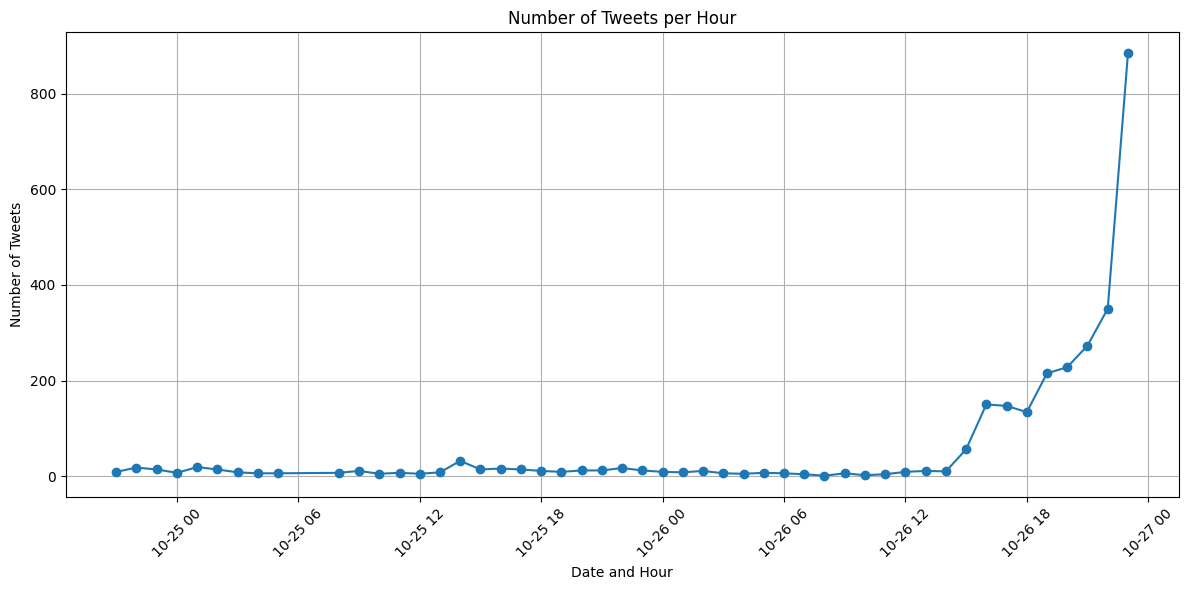

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a new column for date and hour
df['date_hour'] = df['datetime'].dt.floor('H')

# Count tweets per date and hour
tweet_counts = df['date_hour'].value_counts().sort_index()

# Create a DataFrame for plotting
tweet_counts_df = pd.DataFrame(tweet_counts).reset_index()
tweet_counts_df.columns = ['date_hour', 'count']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts_df['date_hour'], tweet_counts_df['count'], marker='o', linestyle='-')
plt.title('Number of Tweets per Hour')
plt.xlabel('Date and Hour')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid()
plt.show()

In [27]:
#houlrly 

In [ ]:
df_grouped_date_sentiment = df.groupby(by=["datetime","sentiment_category"],as_index=False).count()
df_grouped_date = df.groupby(by=["date only"],as_index=False).count()
df_grouped_date = df_grouped_date[["date only","content_x"]] 
df_grouped_date_sentiment = df_grouped_date_sentiment[["date only","Sentiment_Label","content_x"]]
max_2 = df_grouped_date.sort_values(by="content_x",ascending=False).iloc[:2]
fig = plt.subplots(2,1,figsize=(13,12))
plt.subplot(2,1,1)
sns.lineplot(data=df_grouped_date , x="date only",y="content_x")
sns.scatterplot(data=df_grouped_date , x="date only",y="content_x")
plt.ylabel("No. of Tweets")
plt.xlabel("Date")
plt.title("Overall Trend in Tweet Count")
plt.text(max_2["date only"].iloc[1]+timedelta(days=1), max_2["content_x"].iloc[1], str(max_2["date only"].iloc[1]))
plt.text(max_2["date only"].iloc[0]+timedelta(days=1), max_2["content_x"].iloc[0], str(max_2["date only"].iloc[0]))
plt.plot(max_2["date only"].iloc[0], max_2["content_x"].iloc[0],marker='o')
plt.plot(max_2["date only"].iloc[1], max_2["content_x"].iloc[1],marker='o')
plt.tight_layout()
plt.subplot(2,1,2)
sns.lineplot(data=df_grouped_date_sentiment , x="date only",y="content_x", hue="Sentiment_Label", legend="full")
plt.ylabel("No. of Tweets")
plt.xlabel("Date")
plt.title("Trend in Tweet Count overlayed by Sentiment")
plt.tight_layout()